Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска. 

Вам необходимо проверить следующие гипотезы:

1)	Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

2)	Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.


#### Загрузка пакетов


In [80]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

#### Загрузка данных

In [81]:
df = pd.read_csv(r"C:\Users\Credu\Desktop\Статистика.csv",sep = ',',encoding = 'utf-8')

In [82]:
df

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
...,...,...,...
232,5,30,М
233,4,36,Ж
234,2,60,Ж
235,2,44,Ж


In [83]:
df.isna().sum()

Количество больничных дней    0
Возраст                       0
Пол                           0
dtype: int64

**Задаём гипотезы:**

H0: Пропорция мужчин, пропустивших более 2 рабочих дней по болезни, не значимо отличается от пропорции женщин, пропустивших более 2 рабочих дней по болезни.

H1: Пропорция мужчин, пропустивших более 2 рабочих дней по болезни, значимо отличается от пропорции женщин, пропустивших более 2 рабочих дней по болезни.

для этого будем использовать z-тест пропорций


In [84]:
male_sample = df[df['Пол'] == 'М']
male_absent_count = len(male_sample[male_sample['Количество больничных дней'] > 2])
total_male = len(male_sample)
male_proportion = male_absent_count / total_male


female_sample = df[df['Пол'] == 'Ж']
female_absent_count = len(female_sample[female_sample['Количество больничных дней'] > 2])
total_female = len(female_sample)
female_proportion = female_absent_count / total_female

# Выполнение z-теста пропорций
count = np.array([male_absent_count, female_absent_count])
nobs = np.array([total_male, total_female])
stat, p_value = proportions_ztest(count, nobs)

# Вывод результатов теста
print("Доля мужчин, пропустивших более 2 дней:", male_proportion)
print("Доля женщин, пропустивших более 2 дней:", female_proportion)
print("Z-тест пропорций:")
print("Статистика =", stat)
print("p-value =", p_value)

Доля мужчин, пропустивших более 2 дней: 0.60431654676259
Доля женщин, пропустивших более 2 дней: 0.6836734693877551
Z-тест пропорций:
Статистика = -1.2512431983794325
p-value = 0.21084576203876126


Исходя из результатов теста, на уровне значимости 0.05 нет достаточных доказательств для отвержения нулевой гипотезы о том, что доля мужчин, пропустивших более 2 дней, не отличается статистически значимо от доли женщин, пропустивших более 2 дней.

#### Визуализация

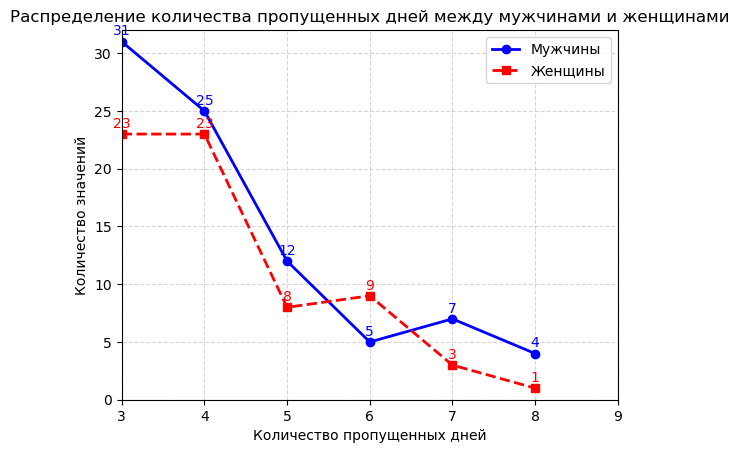

In [85]:
male_counts = df[df['Пол'] == 'М']['Количество больничных дней']
female_counts = df[df['Пол'] == 'Ж']['Количество больничных дней']


male_counts = male_counts[male_counts > 2]
female_counts = female_counts[female_counts > 2]


male_unique, male_counts = np.unique(male_counts, return_counts=True)
female_unique, female_counts = np.unique(female_counts, return_counts=True)


plt.plot(male_unique, male_counts, color='blue', label='Мужчины', marker='o', linestyle='-', linewidth=2)
plt.plot(female_unique, female_counts, color='red', label='Женщины', marker='s', linestyle='--', linewidth=2)

plt.xlabel('Количество пропущенных дней')
plt.ylabel('Количество значений')
plt.title('Распределение количества пропущенных дней между мужчинами и женщинами')
plt.legend()


plt.grid(True, linestyle='--', alpha=0.5)


plt.xlim(3, max(male_unique.max(), female_unique.max()) + 1)
plt.ylim(0, max(male_counts.max(), female_counts.max()) + 1)


for x, y in zip(male_unique, male_counts):
    plt.text(x, y + 0.3, str(y), ha='center', va='bottom', color='blue')
for x, y in zip(female_unique, female_counts):
    plt.text(x, y + 0.3, str(y), ha='center', va='bottom', color='red')

plt.show()

**Задаём гипотезы:**

H0: Пропорция работников старше 35 лет, пропустивших более 2 рабочих дней по болезни, не значимо отличается от пропорции работников младше 35 лет, пропустивших более 2 рабочих дней по болезни.

H1: Пропорция работников старше 35 лет, пропустивших более 2 рабочих дней по болезни, значимо отличается от пропорции работников младше 35 лет, пропустивших более 2 рабочих дней по болезни.

Для проверки этих гипотез будем использовать z-тест пропорций.

In [86]:
older_employees = df[df['Возраст'] > 35]
younger_employees = df[df['Возраст'] <= 35]


older_absent_count = len(older_employees[older_employees['Количество больничных дней'] > 2])
younger_absent_count = len(younger_employees[younger_employees['Количество больничных дней'] > 2])

total_older = len(older_employees)
total_younger = len(younger_employees)

count = np.array([older_absent_count, younger_absent_count])
nobs = np.array([total_older, total_younger])
stat, p_value = proportions_ztest(count, nobs)

print("Доля работников старше 35 лет, пропустивших более 2 дней:", older_absent_count / total_older)
print("Доля работников младше 35 лет, пропустивших более 2 дней:", younger_absent_count / total_younger)
print("Z-тест пропорций:")
print("Статистика =", stat)
print("p-value =", p_value)


Доля работников старше 35 лет, пропустивших более 2 дней: 0.6388888888888888
Доля работников младше 35 лет, пропустивших более 2 дней: 0.631578947368421
Z-тест пропорций:
Статистика = 0.10002856920035127
p-value = 0.9203216442446267


Исходя из результатов теста, на уровне значимости 0.05 нет достаточных доказательств для отвержения нулевой гипотезы о том, что доля работников старше 35 лет, пропустивших более 2 дней, не отличается статистически значимо от доли работников младше 35 лет, пропустивших более 2 дней.

#### Визуализация


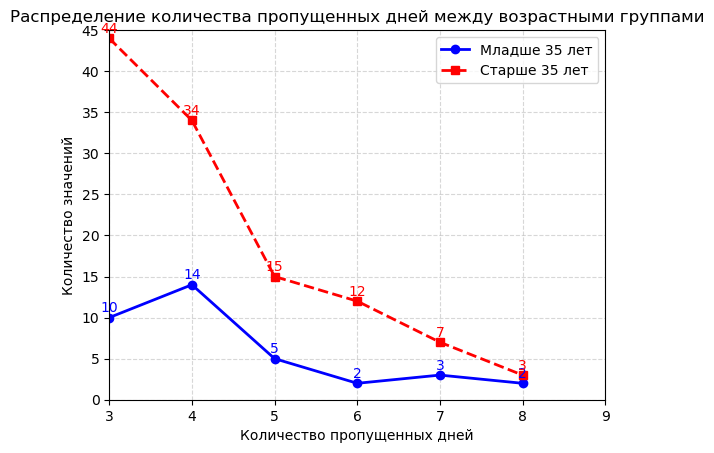

In [87]:
age_counts_younger = df[df['Возраст'] <= 35]['Количество больничных дней']
age_counts_older = df[df['Возраст'] > 35]['Количество больничных дней']

age_counts_younger = age_counts_younger[age_counts_younger > 2]
age_counts_older = age_counts_older[age_counts_older > 2]

unique_counts_younger, counts_younger = np.unique(age_counts_younger, return_counts=True)
unique_counts_older, counts_older = np.unique(age_counts_older, return_counts=True)

plt.plot(unique_counts_younger, counts_younger, color='blue', label='Младше 35 лет', marker='o', linestyle='-', linewidth=2)
plt.plot(unique_counts_older, counts_older, color='red', label='Старше 35 лет', marker='s', linestyle='--', linewidth=2)

plt.xlabel('Количество пропущенных дней')
plt.ylabel('Количество значений')
plt.title('Распределение количества пропущенных дней между возрастными группами')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)

plt.xlim(3, max(unique_counts_younger.max(), unique_counts_older.max()) + 1)
plt.ylim(0, max(counts_younger.max(), counts_older.max()) + 1)

for x, y in zip(unique_counts_younger, counts_younger):
    plt.text(x, y + 0.3, str(y), ha='center', va='bottom', color='blue')
for x, y in zip(unique_counts_older, counts_older):
    plt.text(x, y + 0.3, str(y), ha='center', va='bottom', color='red')

plt.show()